Data Science from Scratch
## Chapter 3 Visualizing Data

Source: https://github.com/joelgrus
***

Notice the following line is added to the code cells below.

>```
%matplotlib inline                               
```

This allows you to display graphs in Jupyter Notebook, right below your code. **If you remove this, the graph will be displayed in an external window.**

If you are interested in using visualization look at:

**Matplotlib** (http://matplotlib.org/): This chapter uses Matplotlib functions.

**Bokeh** (http://bokeh.pydata.org/): Bokeh provides a nice set of pre-defined visualization tools.


## These are some new Python techniques/functions used in this chapter:

In [30]:
# zip() function creates tuples from 2 or more lists.

x = ['a', 'b', 'c']
y = ['1', '2', '3']
z = ['x', 'y', 'z']

for item in zip(x,y):
    print(item)
    
for item in zip(x,y,z):
    print(item)    

('a', '1')
('b', '2')
('c', '3')
('a', '1', 'x')
('b', '2', 'y')
('c', '3', 'z')


In [1]:
# List comprehensions

a = [1,2,3,4,5]
b = [100,200,300,400,500]

# The following statement is a commonly used short form. It does exactly the same thing as the loop beneath it. 
c = [x + y for x, y in zip(a, b)]
print(c)

# This does the same thing as the statement above.
lst = list()
for x, y in zip(a,b):
    lst.append(x+y)
print(lst)    

[101, 202, 303, 404, 505]
[101, 202, 303, 404, 505]


In [1]:
# enumerate() function

x = ['a', 'b', 'c']

# loop through a list of tuples
for t in enumerate(x):
    print(t)

print("---")    

# loop through the key and the value
for i, value in enumerate(x):
    print(i, value)
    
print("---")    

# loop through the key, and ignore the value
for i, _ in enumerate(x):
    print(i)


(0, 'a')
(1, 'b')
(2, 'c')
---
0 a
1 b
2 c
---
0
1
2


## These are the code examples from the book, plus some additional comments:

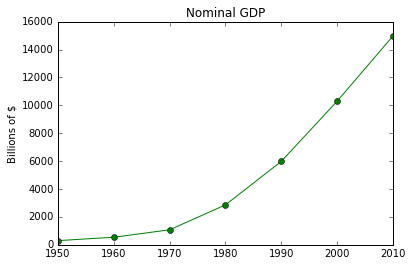

In [5]:
# matplotlib (pp.37-39, Figure 3-1)

%matplotlib inline                
import matplotlib.pyplot as plt   

def make_chart_simple_line_chart(plt):

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]                  # list of years
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]      # list of GDPs

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_chart_simple_line_chart(plt)

[0.1, 1.1, 2.1, 3.1, 4.1]


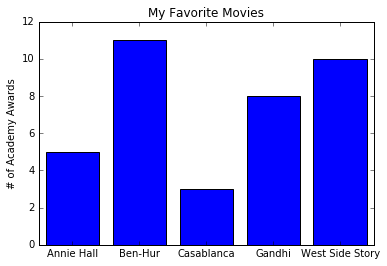

In [17]:
# Bar Charts (p.39-41, Figure 3-2)

%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_simple_bar_chart(plt):

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # 'xs' is a list that holds the x positions of the bars.
    # bars are 0.8 wide by default. We'll add 0.1 to the left coordinates so each bar is centered.
    xs = [i + 0.1 for i, _ in enumerate(movies)]   # See above for what 'enumerate()' does.

    # print(xs) # try printing.
    
    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

    # ----------------------------------------------------------------
    # The line above does the same thing as the following:
    # 
    # lst = list()
    # for i, _ in enumerate(movies):
    #     lst.append(i + 0.5)
    # plt.xticks(lst, movies)
    # 
    # ----------------------------------------------------------------
    
    plt.show()

make_chart_simple_bar_chart(plt)    

histogram = Counter({80: 4, 70: 3, 0: 2, 90: 2, 100: 1, 60: 1})
keys = [76, -4, 96, 66, 86, 56]


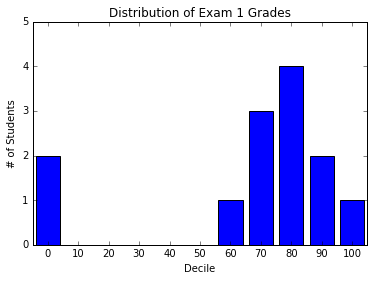

In [59]:
# Bar Charts (cont., Figure 3-3)

%matplotlib inline 
import matplotlib.pyplot as plt
from collections import Counter


# ----------------------------------------------------------------
#
# This code is a litte more complicated than the others.
#
# ----------------------------------------------------------------

def make_chart_histogram(plt):
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    
    # the following is a mini-function
    decile = lambda grade: grade // 10 * 10    # Convert a number to one of these: 10,20,30,40... 80,90,100

    # ----------------------------------------------------------------
    # The line above does the same thing as the following - i.e., define a small function within the scope of
    # make_chart_histogram()
    #def decile(grade):
    #    return grade // 10 * 10    
    # ----------------------------------------------------------------

    lst = [decile(grade) for grade in grades]

    # ----------------------------------------------------------------
    # The line above does the same thing as the following loop.
    #
    # lst = list()
    # for grade in grades:
    #     lst.append(decile(grade))
    # ----------------------------------------------------------------

    # print(lst)                # try printing the value of 'lst'
    histogram = Counter(lst)    # Counter is a sub-class of dict and creates a dictionary-like object with key-value
                                # (item, count) pairs
    print("histogram = {}".format(histogram))    # The output looks like a dictionary, right?

    keys = [x - 4 for x in histogram.keys()]     # shift each bar to the left by 4 (= 1/2 of the bar width)
    print("keys = {}".format(keys))
    
    plt.bar(keys,                                  
            histogram.values(),                  # give each bar the correct height
            8)                                   # give each bar a width of 8
    
    plt.axis([-5, 105, 0, 5])                    # x-axis from -5 to 105,
                                                 # y-axis from 0 to 5

    ticks = [10 * i for i in range(11)]     
    #print(ticks)

    plt.xticks(ticks)                            # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()
    
make_chart_histogram(plt)

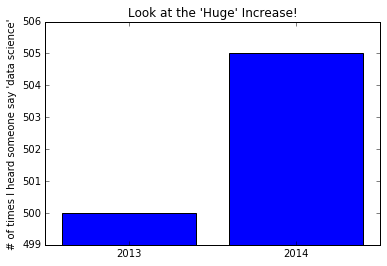

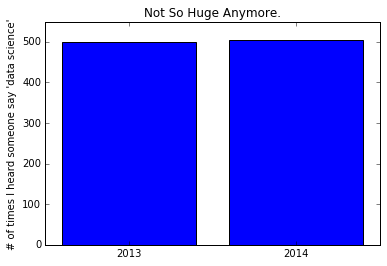

In [10]:
# Bar Charts (cont., Figure 3-4, Figure 3-5)

%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_misleading_y_axis(plt, mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)    # give each bar the width of 0.8.
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])                       # x-axis from 2012.5 to 2014.5, 
        plt.title("Look at the 'Huge' Increase!")               # y-axis from 499 to 506
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")       
    plt.show()
    
make_chart_misleading_y_axis(plt, mislead=True)   
make_chart_misleading_y_axis(plt, mislead=False)

range(0, 9)


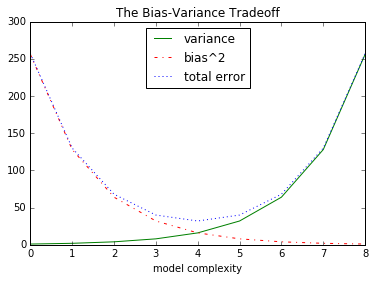

In [28]:
# Line Charts (pp.43, Figure 3-6)

%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_several_line_charts(plt):

    # ----------------------------------------------------------------
    # Don't worry about what these numbers mean.
    # These are like lists with numbers in them.
    # Not sure about what the 3rd line does? See the explanation below.
    # ----------------------------------------------------------------

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    # ----------------------------------------------------------------
    # The line above does the same thing as the following
    # total_error = list()
    # for x, y in zip(variance, bias_squared):
    #     lst.append(x+y)
    # print(total_error)
    # ----------------------------------------------------------------

    xs = range(len(variance))    # range(0,9)
    # print(xs)                  # try printing

    # we can make multiple calls to plt.plotto show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # since we've assigned labels to each series, a legend automatically appears
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()
    
make_chart_several_line_charts(plt)    

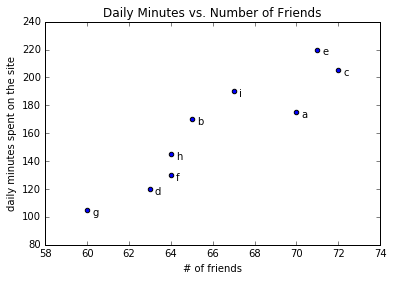

In [18]:
# Scatterplots (pp.44-46, Figure 3-7)

%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_scatter_plot(plt):

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)
    
    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):    
        plt.annotate(label,
                     xy=(friend_count, minute_count),  # put the label with its point
                     xytext=(5, -5),                   # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

make_chart_scatter_plot(plt)

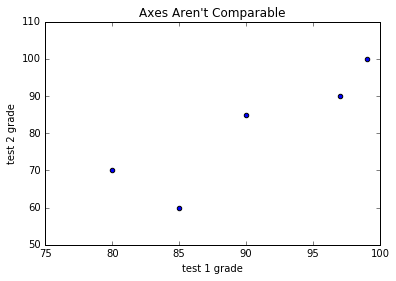

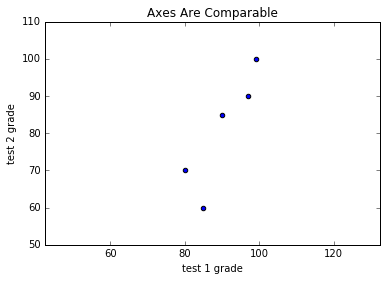

In [15]:
# Scatterplots (cont., Figure 3-8, Figure 3-9)

%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_scatterplot_axes(plt, equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

make_chart_scatterplot_axes(plt, equal_axes=False)
make_chart_scatterplot_axes(plt, equal_axes=True)

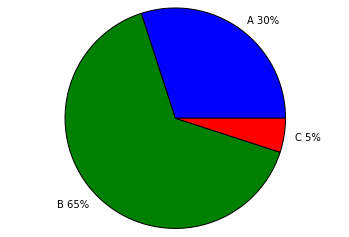

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt

def make_chart_pie_chart(plt):

    plt.pie([0.30, 0.65, 0.05], labels=["A 30%", "B 65%", "C 5%"])

    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()

make_chart_pie_chart(plt)    